              Xərçəng növü  2023  2033 (proqnoz)  Artım (nəfərlə)  Artım (%)  \
7                 Süd vəzi  2849            3850             1001      35.15   
6  Traxeya, bronx, ağciyər  1605            2051              446      27.81   
3                     Mədə  1529            1989              460      30.07   
4     Düz bağırsaq və anus   865            1204              339      39.15   
2              Qida borusu   533             653              120      22.60   
0    Ağız boşluğu və udlaq   245             320               75      30.71   
5                  Qırtlaq   235             280               45      19.28   
8       Dərinin melanoması    74              98               24      33.07   
1                    Dodaq    19              10               -9     -47.15   

   Artım (dəfə ilə)  
7              1.35  
6              1.28  
3              1.30  
4              1.39  
2              1.23  
0              1.31  
5              1.19  
8              1.33  
1

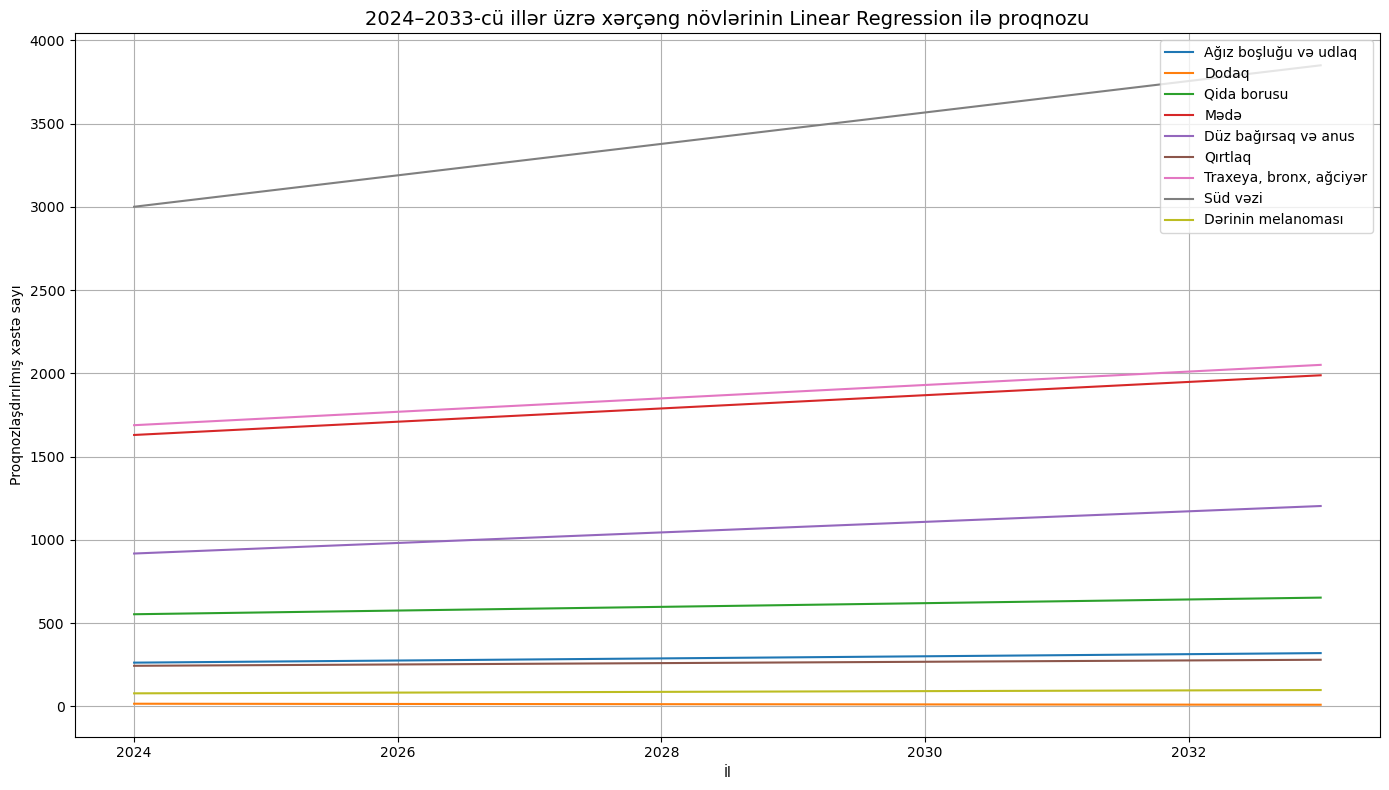

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# İl və xərçəng növləri üzrə real məlumatlar (2000–2023)
years = np.array(list(range(2000, 2024))).reshape(-1, 1)
data = {
    'Ağız boşluğu və udlaq': [81, 116, 121, 152, 153, 149, 133, 172, 160, 150, 155, 188, 198, 201, 201, 205, 217, 211, 228, 215, 245, 260, 245, 245],
    'Dodaq': [26, 41, 26, 32, 35, 29, 27, 38, 25, 33, 21, 21, 16, 21, 22, 18, 19, 25, 18, 20, 19, 22, 20, 19],
    'Qida borusu': [260, 293, 340, 344, 356, 332, 361, 362, 382, 367, 382, 366, 436, 469, 426, 446, 419, 486, 490, 504, 533, 530, 540, 533],
    'Mədə': [574, 715, 777, 816, 857, 919, 925, 980, 1010, 1042, 983, 1066, 1183, 1235, 1211, 1277, 1301, 1371, 1430, 1363, 1529, 1550, 1535, 1529],
    'Düz bağırsaq və anus': [170, 234, 259, 258, 299, 349, 305, 366, 395, 407, 431, 482, 513, 528, 589, 635, 609, 701, 783, 775, 865, 850, 860, 865],
    'Qırtlaq': [143, 154, 161, 162, 152, 151, 167, 182, 200, 167, 182, 217, 178, 215, 216, 220, 195, 234, 186, 213, 235, 240, 238, 235],
    'Traxeya, bronx, ağciyər': [606, 765, 831, 884, 884, 929, 981, 1048, 1027, 1039, 1187, 1147, 1224, 1304, 1341, 1359, 1225, 1379, 1460, 1461, 1605, 1580, 1590, 1605],
    'Süd vəzi': [669, 958, 1064, 1070, 1185, 1198, 1221, 1466, 1460, 1519, 1560, 1693, 1770, 1967, 1799, 2122, 1960, 2638, 2565, 2541, 2849, 2800, 2780, 2849],
    'Dərinin melanoması': [21, 32, 23, 30, 27, 37, 39, 37, 49, 63, 59, 52, 45, 58, 61, 59, 57, 54, 61, 64, 74, 75, 73, 74]
}

# DataFrame yarat
df = pd.DataFrame(data, index=range(2000, 2024))

# Gələcək illər üçün (2024–2033) proqnoz
future_years = np.array(range(2024, 2034)).reshape(-1, 1)
predictions = {}
results = []

# Linear regression tətbiqi və nəticələrin hesablanması
for cancer_type, values in data.items():
    model = LinearRegression()
    model.fit(years, values)
    y_pred = model.predict(future_years)
    predictions[cancer_type] = y_pred

    val_2023 = values[-1]
    val_2033 = y_pred[-1]
    artim_nefer = val_2033 - val_2023
    artim_faiz = (artim_nefer / val_2023) * 100
    artim_defe = val_2033 / val_2023

    results.append({
        "Xərçəng növü": cancer_type,
        "2023": round(val_2023),
        "2033 (proqnoz)": round(val_2033),
        "Artım (nəfərlə)": round(artim_nefer),
        "Artım (%)": round(artim_faiz, 2),
        "Artım (dəfə ilə)": round(artim_defe, 2)
    })

# Nəticələri cədvəl kimi göstər
result_df = pd.DataFrame(results).sort_values(by="2033 (proqnoz)", ascending=False)
print(result_df)

# Vizual qrafik
plt.figure(figsize=(14, 8))
for cancer_type, y_pred in predictions.items():
    plt.plot(range(2024, 2034), y_pred, label=cancer_type)

plt.title("2024–2033-cü illər üzrə xərçəng növlərinin Linear Regression ilə proqnozu", fontsize=14)
plt.xlabel("İl")
plt.ylabel("Proqnozlaşdırılmış xəstə sayı")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()